# Jupyter Notebook zum Import/Export, zur Analyse und Darstellung von Zeitreihendaten
[python-Module: *pandas, matplotlib, numpy*]


## 1. Benötigte Module laden


In [5]:
import pandas as pd
import funx 
import numpy as np
import matplotlib.pyplot as plt
df=funx.startup()

## 2. Datenframe von csv-Dateien einlesen
### Parameter festlegen:
***ndays***   ...Anzahl der Tage, die von heute rückblickend dargestellt werden sollen

In [6]:
ndays=7#beliebig wählbar 
dfs=funx.getdfs_frommulticsv(ndays)
#df.head() #zeigt die ersten 5 Zeilen
#print(dfs)
dfs[0].head()

20200317.txt not found on File Server
20200316.txt not found on File Server


,r1min,mabs,rsum,T,H,p,U
date,,,,,,,
2020-03-18 00:00:00,0.0,1238.74,0.0,21.18,43.16,1013.19,12.41
2020-03-18 00:01:00,0.0,1238.74,0.0,21.18,43.08,1013.11,12.41
2020-03-18 00:02:00,0.0,1238.74,0.0,21.18,43.17,1013.11,12.41
2020-03-18 00:03:00,0.0,1238.74,0.0,21.18,43.10,1013.09,12.41
2020-03-18 00:04:00,0.0,1238.74,0.0,21.17,43.08,1013.09,12.41


In [7]:
df=dfs[0]
df.columns[1]



'mabs'

## 3. Datenframe plotten

Erzeugen eines Multi-Linien-Plots

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

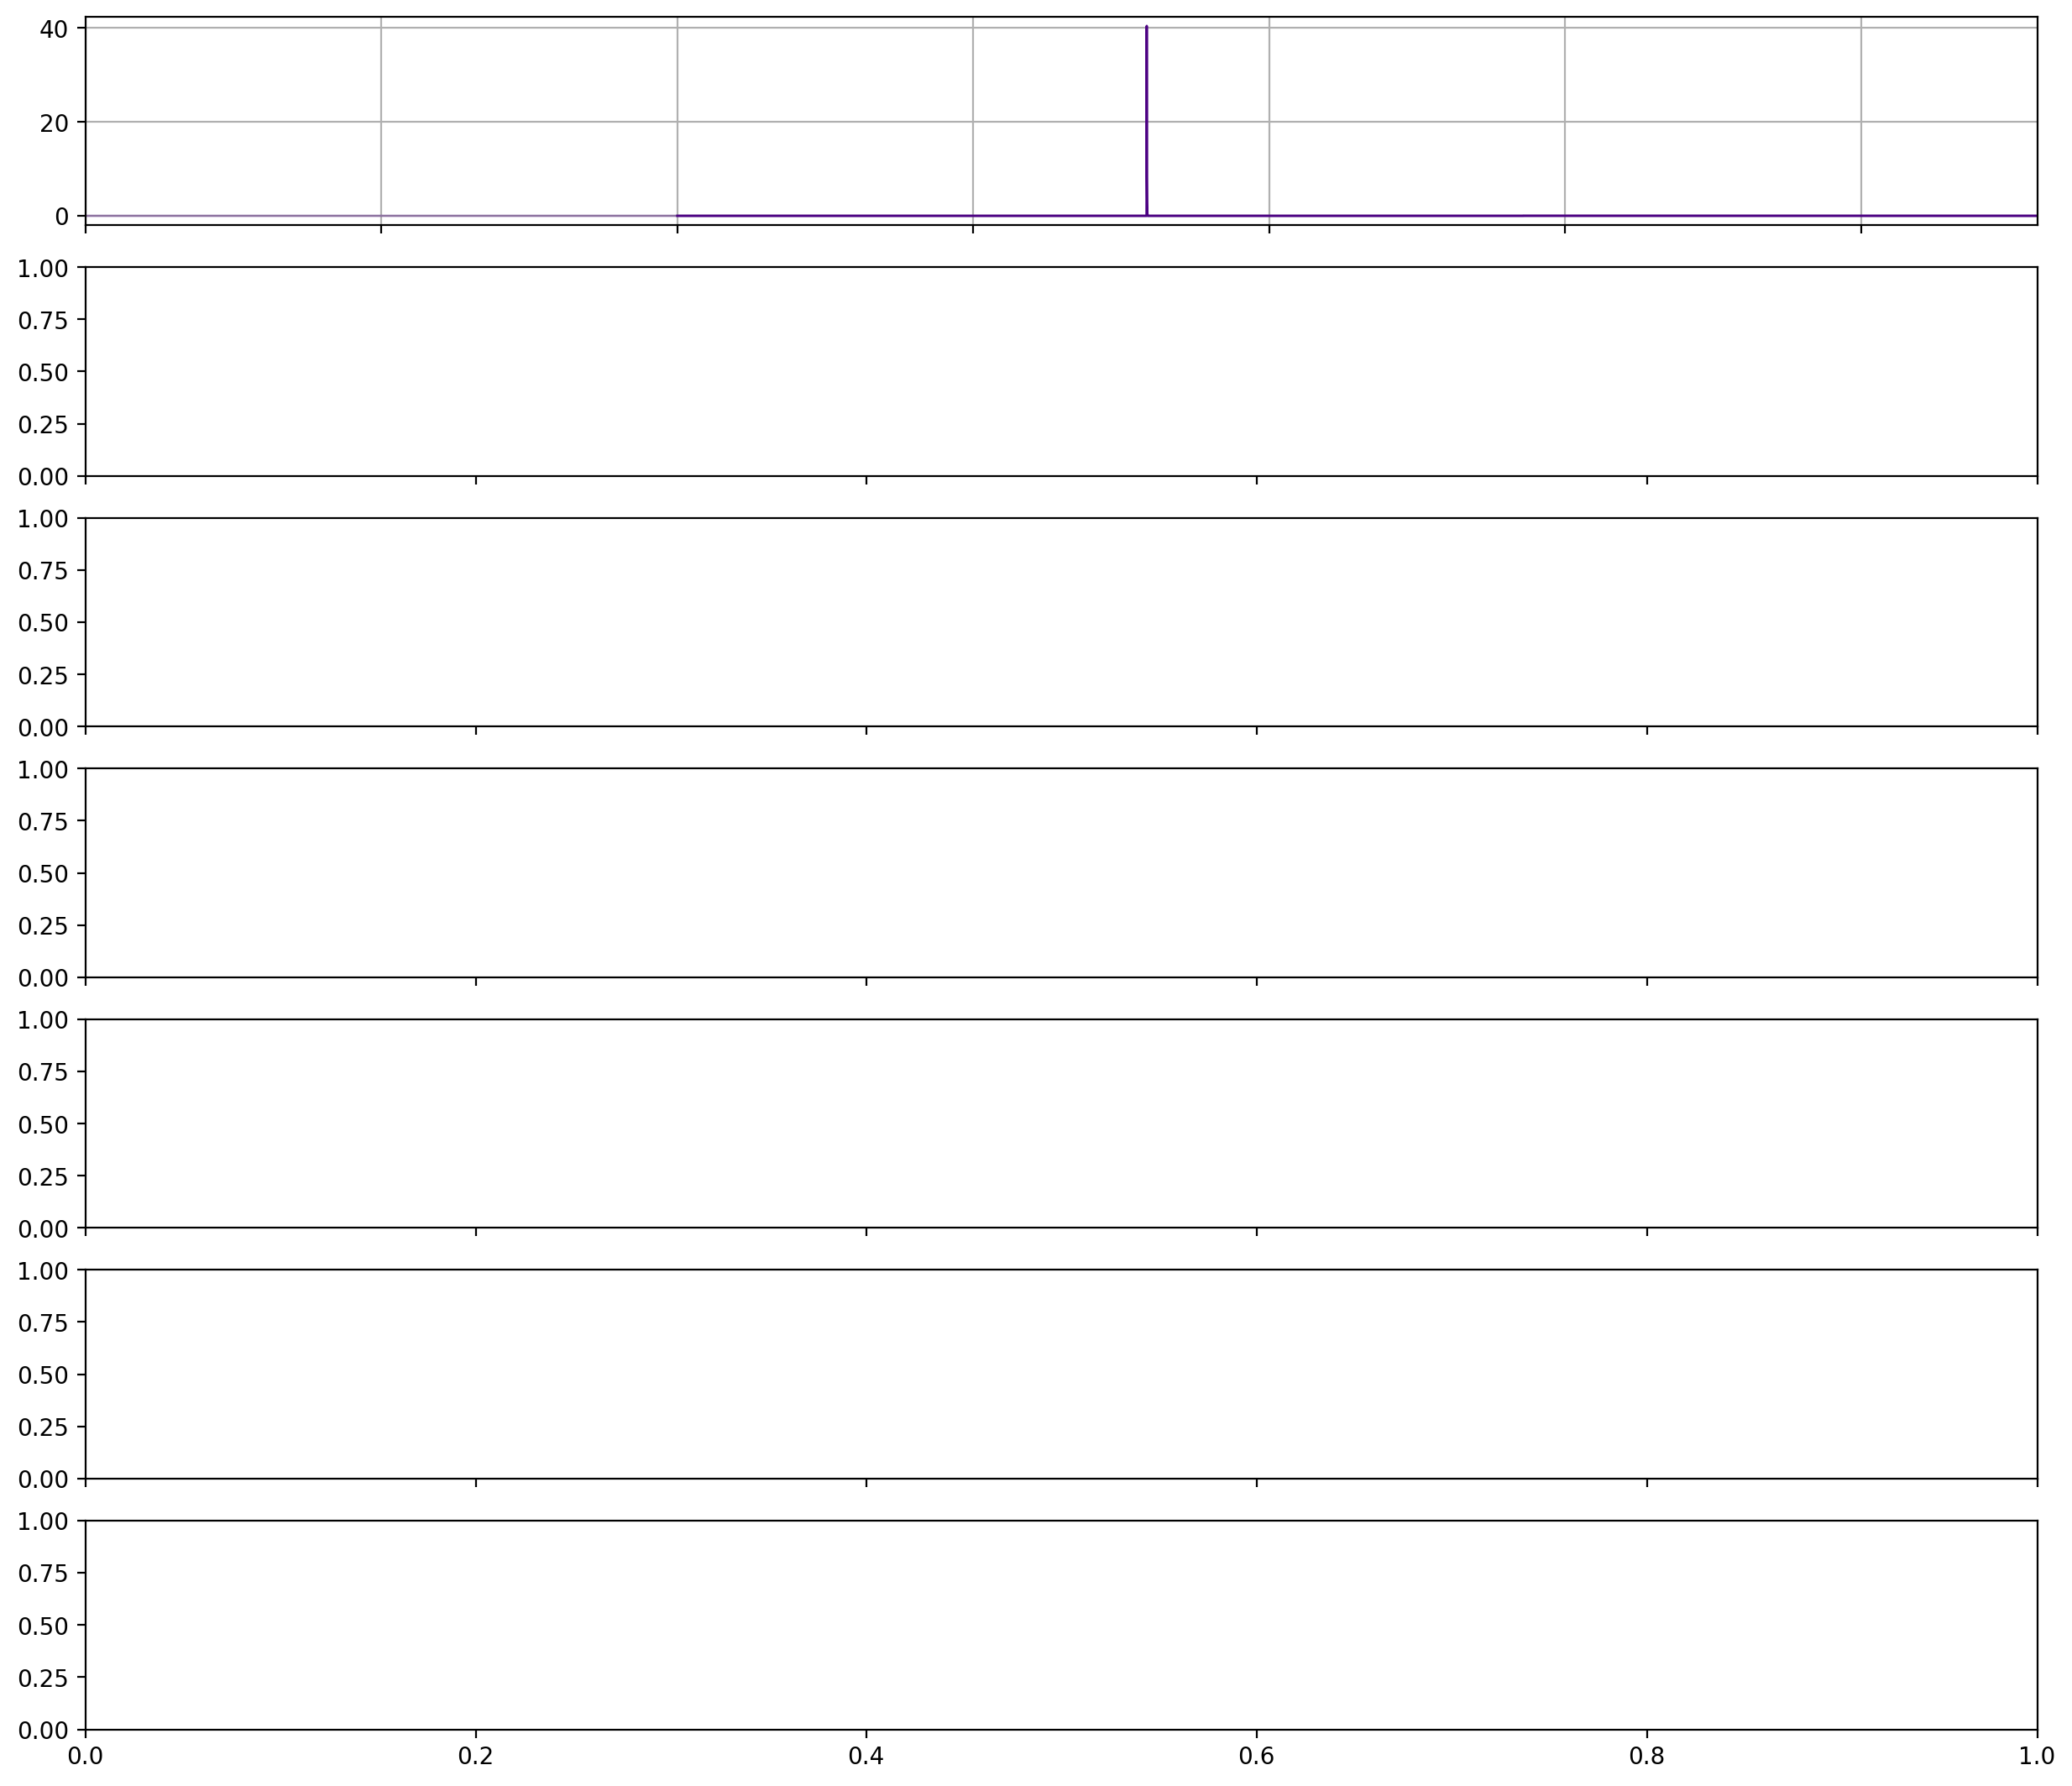

In [8]:
## Darstellung der ganzen Zeitspanne
startdate=str(dfs[1].index[0])
enddate=str(dfs[1].index[-1])
## alternativ: Festlegen eines Zeitabschnitts zur Darstellung
#startdate="2020-02-26 00:00:00"
#enddate="2020-02-26 18:00:00"

funx.dropdown_menu(dfs,'myplot.png',startdate,enddate)
#plt.savefig('myplot.png',dpi=300)

## 4. Datenframe ergänzen/analysieren
- Hinzufügen von Spalten mit NaN-Analyse-Werten 
- Ausgabetabelle mit NaN-Werten für jeden Tag

In [ ]:
#for df in dfs:
    df=df.resample("1min").max() #erstellt für jede Minute eine Messwertzeile und übernimmt vorhandene Werte, Lücken erhalten den Wert: NAN
    df['nan']=np.where((df.isnull().all(1)),1,0)  #legt eine Spalte 'nan' an: 1 kein Messwert in Minutenreihe, 0 Messwerte vorhanden
    df['nanr']=np.where((df['mabs'].notna()==0)&(df['nan']==0),1,0)  #Spalte nanr, Regenwert fehlt: 1; Regenwert vorhanden oder ganze Zeile fehlt:0
    cols=['nan','nanr']
    df['nan_sum']=df[cols].sum(axis=1).groupby(df.index.date).cumsum()  #Summenlinie beider nan-Werte mit täglichem Reset
    df['nan_sum'].groupby(df.index.date).max()
    df.head()

## 5. Export der Daten

* Datenframe als csv-Datei, xlsx-Datei (mit Diagrammen) und png-Datei der dargestellten Plots
* Dateien manuell lokal speichern (Menüaufruf: siehe Screenshot)

<img src="image1.png" width="300">

In [ ]:
dfs[0].to_csv('Daten_Logger01.csv')
dfs[1].to_csv('Daten_Logger02.csv')
#funx.exportdf_toexcel_withcharts(df,'MyExcelFile.xlsx')
funx.exportdfs_toexcel_withcharts(dfs,'MyExcelFile.xlsx')